In [69]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
main_df = pd.read_csv('../data/raw/diabetes.csv')
main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Eliminación de variables innecesarias</h3>

In [71]:
main_df = main_df.drop('Pregnancies', axis=1)

<h3>Búsqueda de valores vacíos</h3>

In [72]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<h3>Búsqueda de duplicados</h3>

In [73]:
duplicated = main_df[main_df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


<h3>Búsqueda de valores atípicos</h3>

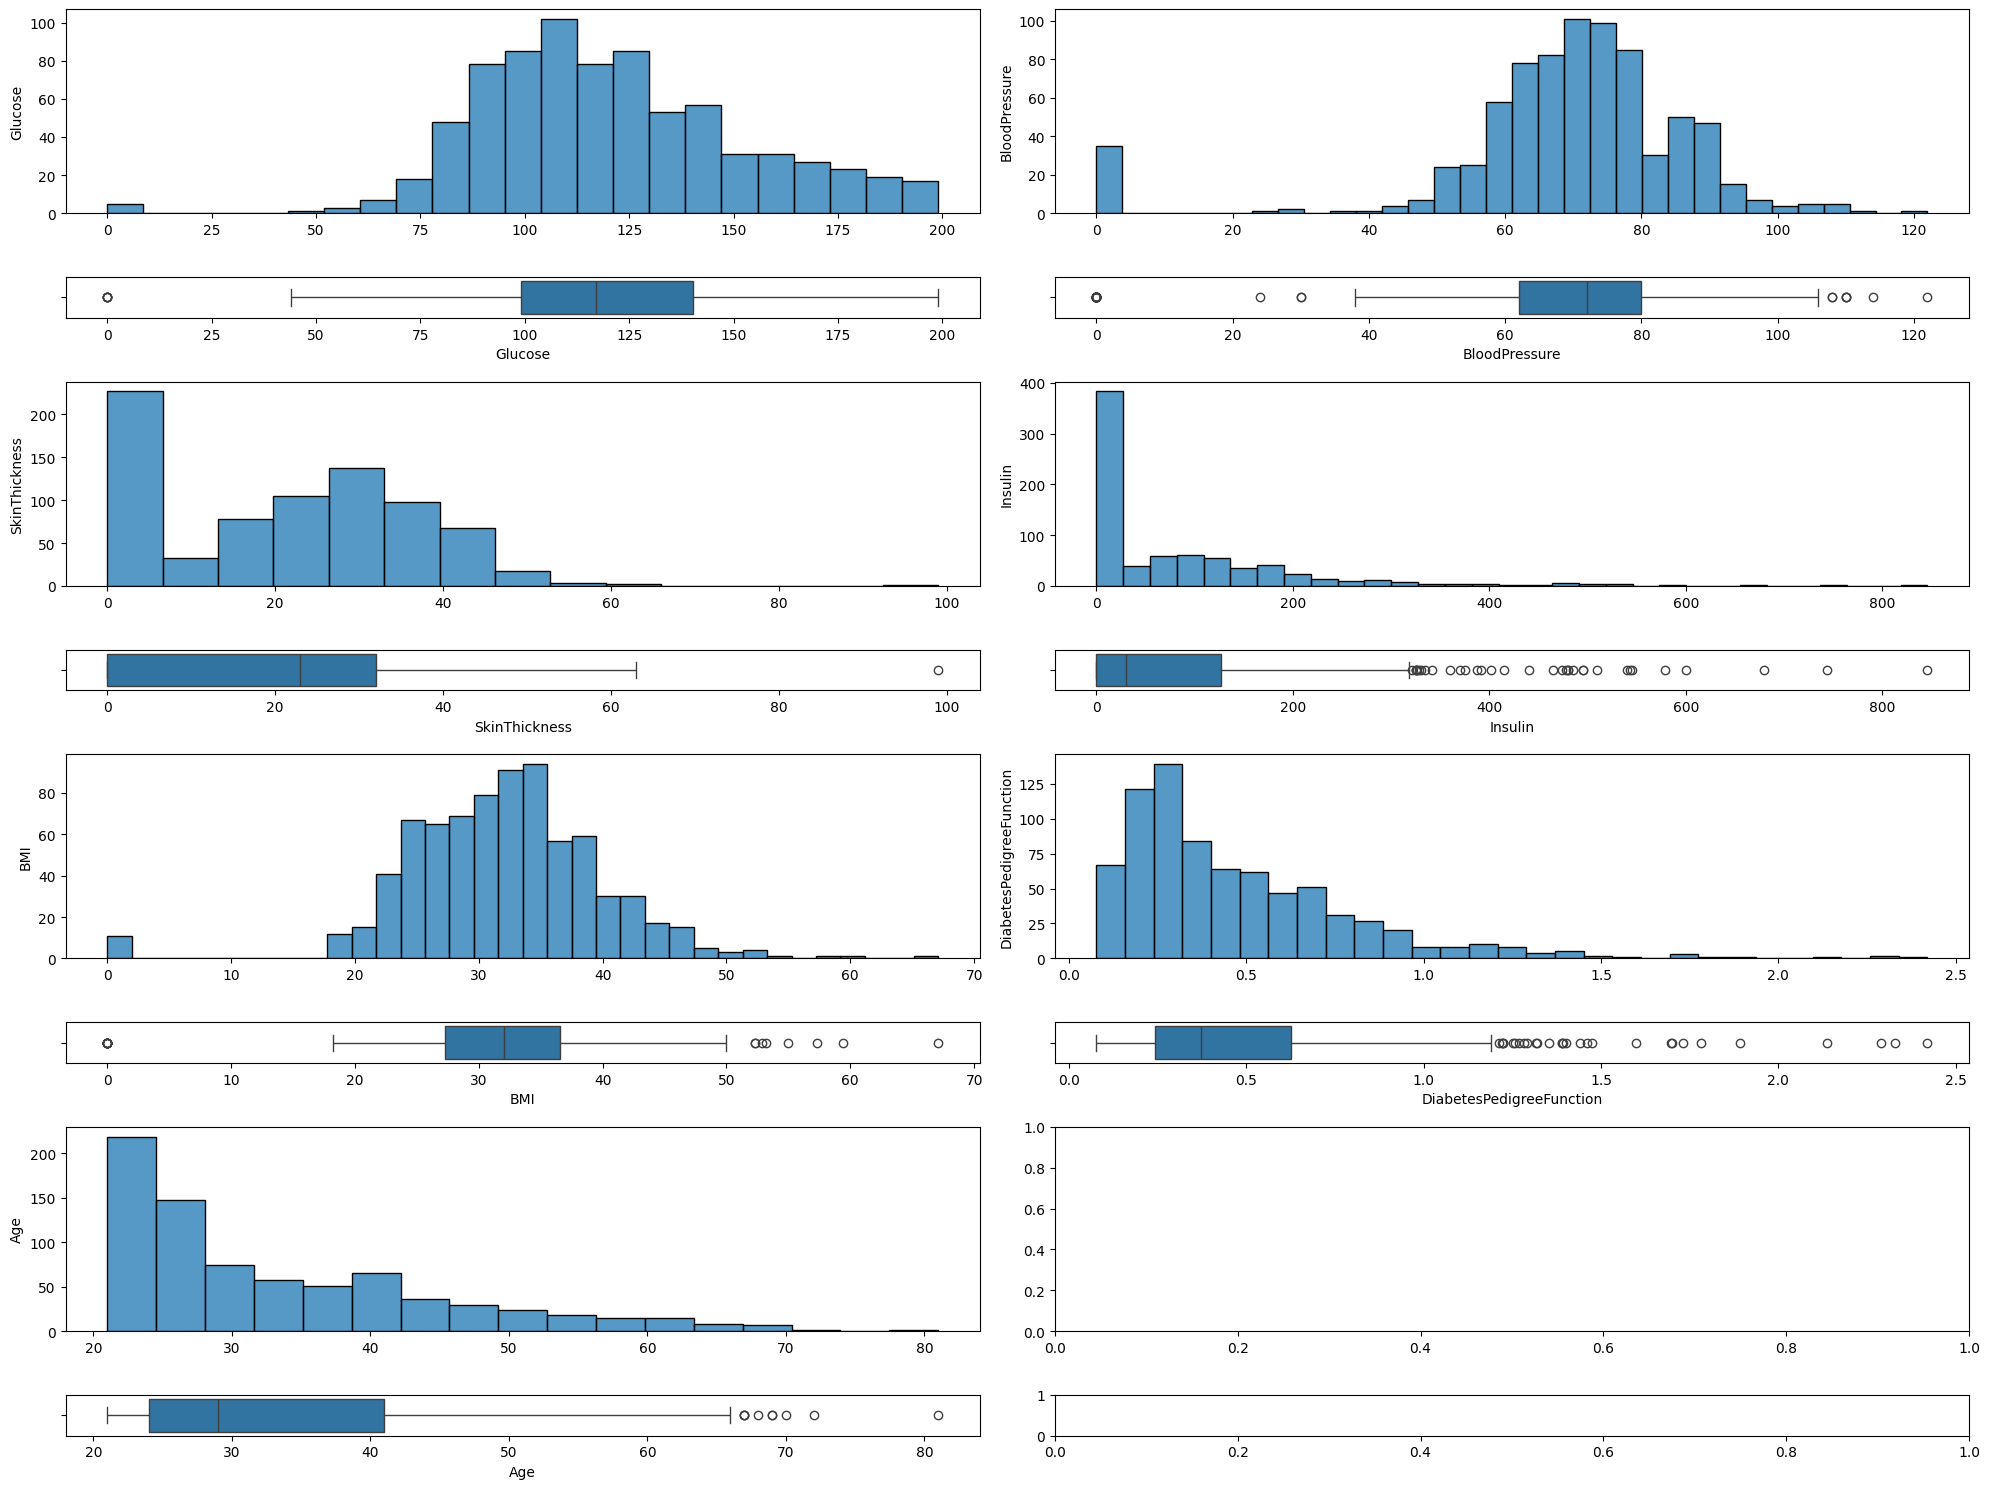

In [74]:
fig, axis = plt.subplots(8, 2, figsize=(20, 15), gridspec_kw={'height_ratios': [10, 2] * 4})

sns.histplot(ax=axis[0, 0], data=main_df, x="Glucose").set(xlabel=None)
axis[0, 0].set_ylabel('Glucose')
sns.boxplot(ax=axis[1, 0], data=main_df, x="Glucose")

sns.histplot(ax=axis[0, 1], data=main_df, x="BloodPressure").set(xlabel=None)
axis[0, 1].set_ylabel('BloodPressure')
sns.boxplot(ax=axis[1, 1], data=main_df, x="BloodPressure")

sns.histplot(ax=axis[2, 0], data=main_df, x="SkinThickness").set(xlabel=None)
axis[2, 0].set_ylabel('SkinThickness')
sns.boxplot(ax=axis[3, 0], data=main_df, x="SkinThickness")

sns.histplot(ax=axis[2, 1], data=main_df, x="Insulin").set(xlabel=None)
axis[2, 1].set_ylabel('Insulin')
sns.boxplot(ax=axis[3, 1], data=main_df, x="Insulin")

sns.histplot(ax=axis[4, 0], data=main_df, x="BMI").set(xlabel=None)
axis[4, 0].set_ylabel('BMI')
sns.boxplot(ax=axis[5, 0], data=main_df, x="BMI")

sns.histplot(ax=axis[4, 1], data=main_df, x="DiabetesPedigreeFunction").set(xlabel=None)
axis[4, 1].set_ylabel('DiabetesPedigreeFunction')
sns.boxplot(ax=axis[5, 1], data=main_df, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[6, 0], data=main_df, x="Age").set(xlabel=None)
axis[6, 0].set_ylabel('Age')
sns.boxplot(ax=axis[7, 0], data=main_df, x="Age")

plt.tight_layout()
plt.show()

In [75]:
# Get outliers percent
def get_outliers(df):
    columns = df.select_dtypes(include=[np.number]).columns

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        severe_lower = Q1 - 3 * IQR
        lower = Q1 - 1.5 * IQR
        upper = Q1 + 1.5 * IQR
        severe_upper = Q1 + 3 * IQR

        outliers = (df[column] < lower) | (df[column] > upper)
        severe_outliers = (df[column] < severe_lower) | (df[column] > severe_upper)
        
        outliers_percent = outliers.sum() / len(df) * 100
        severe_outliers_percent = severe_outliers.sum() / len(df) * 100

        if outliers_percent <= 5:
            df = df[~outliers]
        
        if severe_outliers_percent <= 5:
            df = df[~severe_outliers]
    
    return df


print(main_df.shape)
main_df_cleaned = get_outliers(main_df)
print(main_df_cleaned.shape)

(768, 8)
(677, 8)


/tmp/ipykernel_7359/3942919355.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~severe_outliers]


<h3>Análisis multivariante numérico-numérico</h3>

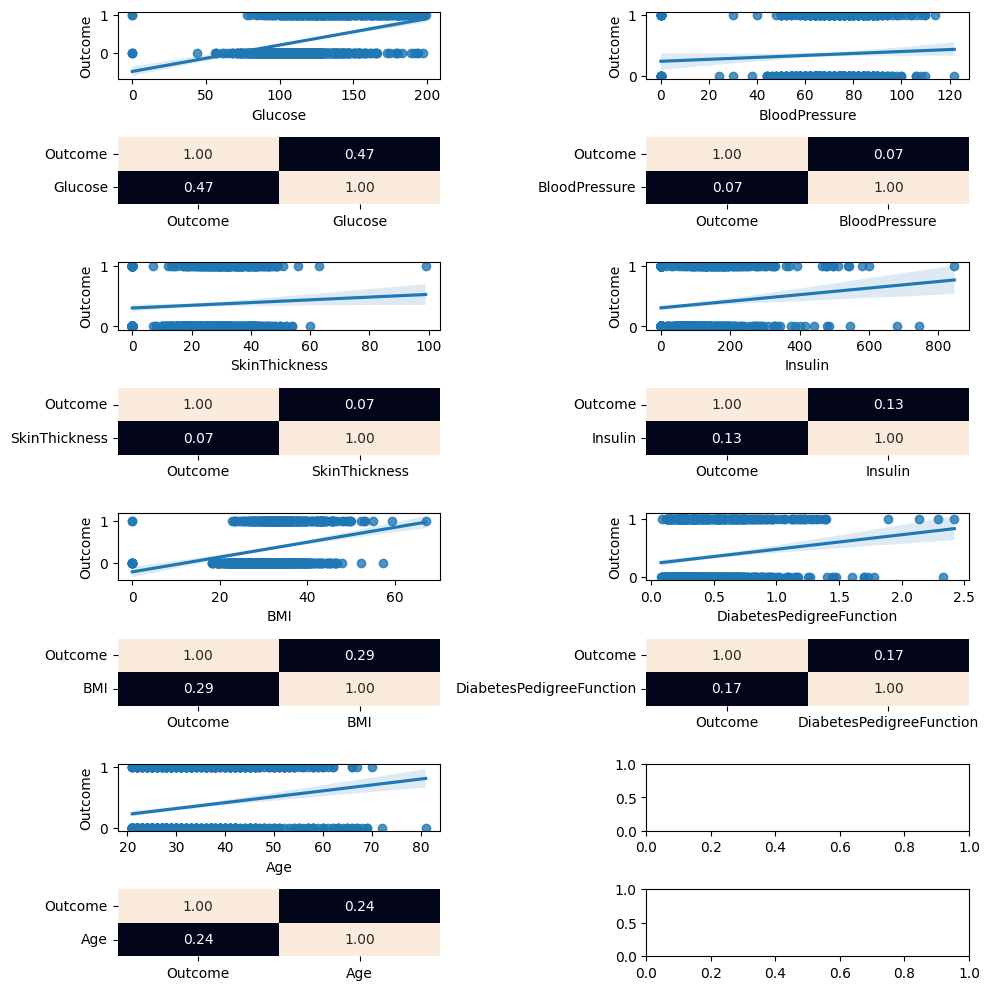

In [76]:
# Numerical-numerical analysis
fig, axis = plt.subplots(8, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = main_df, x = "Glucose", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = main_df, x = "BloodPressure", y = "Outcome")
sns.heatmap(main_df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = main_df, x = "SkinThickness", y = "Outcome")
sns.heatmap(main_df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = main_df, x = "Insulin", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = main_df, x = "BMI", y = "Outcome")
sns.heatmap(main_df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = main_df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(main_df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[6, 0], data = main_df, x = "Age", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

plt.tight_layout()
plt.show()

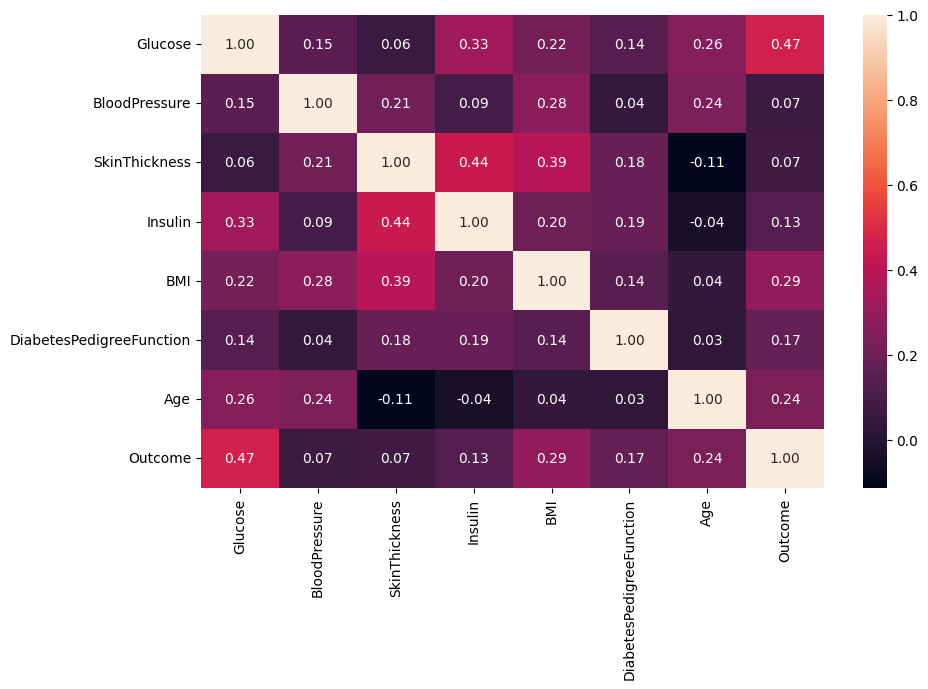

In [77]:
# Heatmap
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(main_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [78]:
# Descriptive analysis
main_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
# Save clean dataframe into a csv file
main_df.to_csv('../data/processed/PROCESSED_DF.csv', index=False, encoding='utf-8')